# Computational Intelligence in Manufacturing Systems
# MFAIMFG
#### Created by: Joseph Aristotle de Leon
#### Submitted to: Dr. Robert Kerwin Billones
#### Date Created: November 8, 2020
#### Date Revised: November 21, 2020

# Machine Learning Exercise 2 - Logistic Regression

## INTRODUCTION

In contrast to linear regression, logistic regression is fitting the data in a logistic function (commonly the sigmoid function). Data is being fit in the logistic function not to predict/estimate the expected/target value that are continous in nature but to classify into distinct labels/classifications. That is why the data that we will be working on have target values that are either 1 or 0 (accepted or rejected respectively).  

In this activity, we will be dealing with data that can be classified and separated with a linear line and with complex lines like circles. For the first data, it deals with classifying a pass/fail given two exam scores of each student. The second data is about classifying microchips as accepted/rejected based on the outputs of two quality assurance tests. 

## CODE DESIGN

To start, the codeblock below imports the necessary libraries to assist us in implementing linear regression in python.

Numpy (or Numerical Python) is responsible for handling mathmatical operations of matrices which include addition, multiplication, transposition and other matrix manipulations. It is worth noting that the data we are working on is represented as a matrix, where the columns represent the features and its corresponding output value, while the rows contain the sample/instance points.

Pandas is imported so that data from an external file (in this case we use csv data) can be accessed and manipulated within the python program. It is mainly used for data analysis (descriptive statistics).

Matplotlib is used to visualize data. In the context of this activity, matplotlib creates a scatter plot to map the input(X) and output(y) values of each sample point. Additionally, we could also embed a line to the scatter plot to show regression line that best fits/generalizes the data points. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We copy the data that we intend to work on into the python program. 

We need first to specify the file (and its file path) that we would access. The os library is also imported in order to determine the current working path (through the .getcwd() method), which can be appended to the file name of the data. 

Then we use pandas method .read_csv() to copy the data from the text file to the variable named data. Doing this makes the datatype of the variable data into a dataframe. The arguments needed by this pandas method are the path location and ,as an option, the column names which are in a list. 

To verify that the data from the file is transferred to the program, we call data.head() to show the values of the top 5 samples. The format of presenting the data is almost similar to that of Excel. 

In [3]:
import os
path = os.getcwd() + '\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


It is a good idea to visualize first the data that we are working on. We first separate the sample points based on their target outputs which are positive (denoted by 1) and negative (denoted by 0). The first two lines are responsible for this where the sample points are saved either to 'positive' or 'negative'.

Then we create a scatter plot using these two variables. As we can see, we could create a line going down to separate the positives to the negatives. The problem is knowing the equation of the line that best separates the sample points.

       Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1
51  99.272527  60.99

Text(0, 0.5, 'Exam 2 Score')

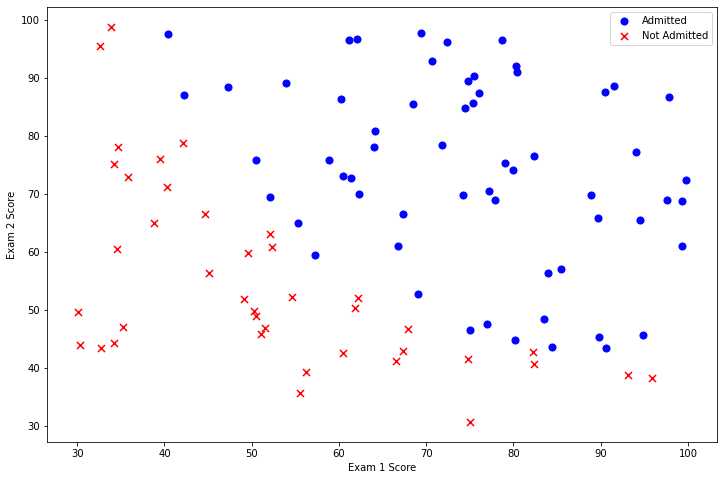

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print(positive)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

We first define a function called sigmoid to compute the sigmoid value of the input. The input (z) would be the computed value for the line equation (with the input features and parameters). We use a sigmoid function so that we can easily separate the computed values to either positive (1) or negative (0). 

<img src="files/sigmoid.png" width="200" height="200" align="center"/>


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

To better visualize what a sigmoid function look, we run the following code below where we compute the sigmoid value of each input within the set range. One feature of the fucntion is that it platues at 0 and 1 (which is why its used to designate the positives to the negatives).  

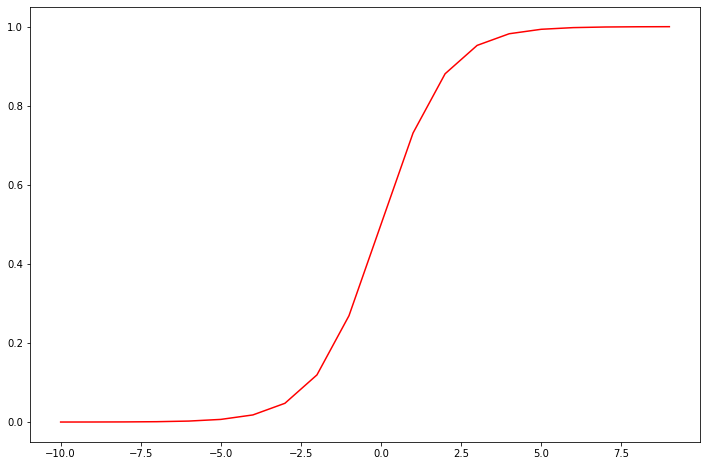

In [5]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In this linear regression problem, we would be using the cross entropy loss function defined by the equation below:

<img src="files/cross entropy loss.png" width="500" height="500" align="center"/>

This loss function is used because it incentivizes (prefers) set of parameters that would result in computed values that are very near to 0 and 1 (the target values). Intuitively, if the left most term would cancel out if the target value of a sample point is 0, and the right most value would cancel out if the target is 1. 

In the code below, we create the function cost that computes for the cross entropy loss. The first variable holds the values that are computed from the left most term of the equation, while the second is the right term. Then we finalize solution by taking the average of the difference between the first and second variable. 
    


In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Just like what we did in the linear regression problem, we need to add an extraneous feature of ones to satify the matrix operation rules. This is multiplied with the value of the intercept

In [7]:
data.insert(0, 'Ones', 1)

We define the features and target outputs from the sample points into X and y respectively. 

In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

We convert the values, which are in a dtaframe datatype, to a numpy array so that matrix operations can be performed. Likewise, we initialize the set of parameters to all zeros.

In [9]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

We check the dimmensions of the matrices to know if we follow the rules of its matrix operations. As we can see, the multiplication between the features and parameters can be performed.

In [10]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

We check first the initial value of the cost by callng the cost() function that we defined. At the start, the cost value is 0.69

In [11]:
cost(theta, X, y)

0.6931471805599453

In order to minimize the cost value, we define the function for the gradient descent called gradient(). In this function, it would dictate the value and direction (in terms of sign) of the value that must be added to the parameters to achieve the optimal solution. Getting the equation of the gradient is based on the differentiation of the cost function. 

In [12]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

We call the gradient function. It outputs the values that must be added to the parameters. 

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In order to perform gradient descent until the global minima of the cost value is obtained, we use the optimizer function of the scipy library. Specifically, we use the fmin_tnc method or the Truncated Newton algorithm that takes in the arguments the cost function, set of parameters, the gradient function and the sample points. 

The output is an array that contains the set of the optimized parameters which are [-25.16131872,   0.20623159,   0.20147149], the number of iterations that the optimizer take which is 36, and the return code which dictates if the optimization is a succces. Since it returns a 0, It means it has only reached a local minima. 

In [14]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

We see the value of the cost, which is 0.20, for the provided parameters by the optimization library.

In [15]:
cost(result[0], X, y)

0.20349770158947425

To obtain the accuracy of the optimization, we first define a function called predict() that would provided the computed value of the sample points based on the set of parameters that was found out.  

In [16]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

The predict() function was used and we tally all correct predictions and store them as 1 in the 'correct' list. The accuracy is total of all correct predictions divided by the total number of sample points. 

In [17]:
theta_min1 = np.matrix(result[0])
predictions = predict(theta_min1, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


We would need to copy the data from the second data file (in text format) to the program. The code is similar to what we did in the precious task, but we need to specify the new file location of the data we would be working on. 

To verify that we copied the correct data, we call the .head() method. 

In [18]:
path = os.getcwd() + '\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


We visualize the sample points using the following code below (similar to what was done above). 

As we can see, separating the sample points would not be possible with a straight line only. Instead, we would be needing a best fit line that is one of the conic sections like a circle or an ellipse to separate the accepteds from the rejecteds.

Text(0, 0.5, 'Test 2 Score')

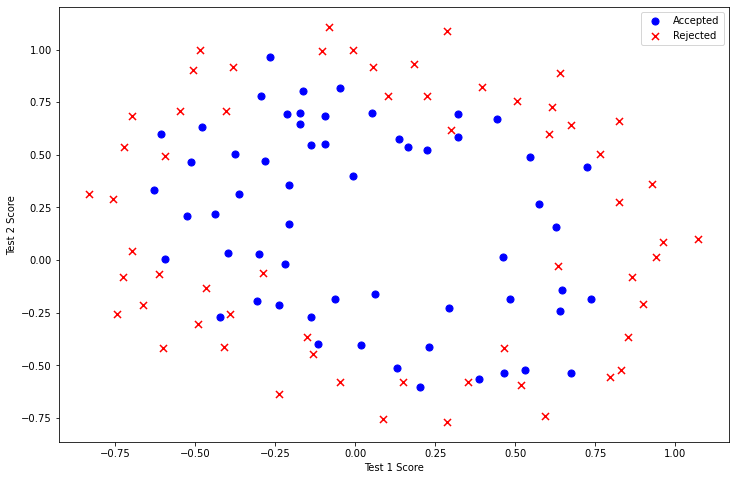

In [19]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

Since we are dealing with data that can be best fitted in a circular line, we need an equation that is not linear. This would mean that we need to increase the degree of each feature. Hence, feature mapping is performed. 


In the code below, aside from adding an additional feature of ones, we also add features that would be equivalent to the nth power of the features. In this case, we added features that takes the following nth value of each feature.


In [20]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F11,F30,F21,F12,F40,F31,F22,F13
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


One problem with adding more feature is that it is susceptible for the best fit line to overfit the sample points, which means that the line would try to capture the very exact shape of how the data is seen to be separated. This is a problem if new samples are introduced which may predict for an incorrect value/classification. 

To avoid overfitting, we add a penalty/regularizer to the cost function that we used earlier. In the code we name a variable called 'reg' that would be the sum of all the parameters squared (expect the ones). The idea behind it is that it would minimize the value of some parameters (be near 0) so that it would have a minimal effect on the prediction. If all parameters have a relatively high weight value, the cost value would be high. We need to minimize the cost value and one way to do it is to root out some of the parameters. 

In this code, L2 regularization was used (because the parameters are squared). The equation of the cost function with the regularizer is shown below.

<img src="files/cost reg.png" width="500" height="500" align="center"/>

In [21]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

We also define the gradient function for the cost function that we made. Since a regularizer term was added, we need to change the gradient function to take into account of it.

In [22]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

We save the values of both the features and target values to the variables X2 and y2 respectively.

In [23]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

We check the shape of the features and target outputs

In [24]:
X2.shape,y2.shape

((118, 11), (118, 1))

We convert both variables from a dataframe to a numpy matrix. We also initialize the values of the parameters to be all zeros. 

In [25]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

We set the learning rate (the hyperparameter) to be 1.

In [26]:
learningRate = 1

We check first the initial value of the cost by callng the costReg() function that we defined. At the start, the cost value is 0.69

In [27]:
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

We call the gradient function. It outputs the values that must be added to the parameters. 

In [28]:
gradientReg(theta2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

We use again the scipy method fmin_tnc() to find the best set of parameters that would give us the lowest cost value. We change the arguments that would fit with the data we are using, ie we change the cost function, gradient descent function. 

As we can see, the optimal set of parameters are 
This means that the best fit line that would separate the data is

In [29]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.22702519e-04,  7.19894617e-05, -3.74156201e-04, -1.44256427e-04,
         2.93165088e-05, -5.64160786e-05, -1.02826485e-04, -2.83150432e-04,
         6.47297947e-07, -1.99697568e-04, -1.68479583e-05]),
 96,
 1)

We then compute for the accuracy. The predict() function was used and we tally all correct predictions and store them as 1 in the 'correct' list. The accuracy is total of all correct predictions divided by the total number of sample points. 

It is shown that the accuracy is 

In [30]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

theta_min

accuracy = 77%


matrix([[ 1.22702519e-04,  7.19894617e-05, -3.74156201e-04,
         -1.44256427e-04,  2.93165088e-05, -5.64160786e-05,
         -1.02826485e-04, -2.83150432e-04,  6.47297947e-07,
         -1.99697568e-04, -1.68479583e-05]])

Alternatively, we can perform logistic regression through the sklearn library to save up the lines of code needed to write. Just like in the linear regression problem, we use the .fit() method to run all the computations of the gradient descent. What is only needed is to insert the arguments for the data and other hyperparameters like the penalty/regularizer. 

In [31]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2',C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression()

In [32]:
model.coef_

array([[ 1.44222447e-05,  2.90766476e-01, -1.60709166e+00,
        -5.82238817e-01,  1.79390506e-02, -2.12910848e-01,
        -4.00176826e-01, -1.37174057e+00,  2.28055315e-02,
        -9.50180540e-01,  3.42904688e-02]])

We compute the accuracy of the model by calling the .score() method. It is seen that the accuracy is 82%

In [33]:
model.score(X2, y2)

0.6610169491525424

## ANALYSIS OF RESULTS

For the first example, we found out that the best equation that would classify the data is y=sigmoid((0.20623159)x1 + (0.20147149)x2 -25.16131872); where y<0.5 is 'rejected' while y>=0.5 is accepted. We can run the code below (which takes in all possible combinations of the features and their corresponding predictions) to see how the data can be separated. 

Text(0, 0.5, 'Test 2 Score')

C:\Users\PREDATOR-USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


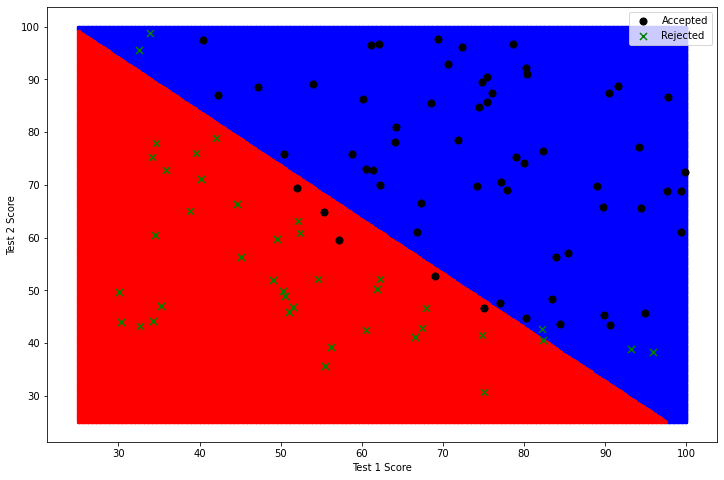

In [34]:
x1=np.arange(25, 100.1, 0.1)
x2=np.arange(25, 100.1, 0.1)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data1=pd.DataFrame(data=combinations)

x1 = data1[0]
x2 = data1[1]

data1.insert(0, 'Ones', 1)

X1 = np.array(data1)
y1 = predict(theta_min1,X1)
data1['Predicted']=y1

data = pd.read_csv(os.getcwd() + '\ex2data1.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

pred_positive = data1[data1['Predicted'].isin([1])]
pred_negative = data1[data1['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

For the second problem, the method that offered the least cost value is the long method where the accuracy is 77%. Its best fit function is: 

Y=sigmoid(1.22702519e-04 +  [7.19894617e-05] x - [3.74156201e-04] x^2  -[1.44256427e-04] (x)(y) + [2.93165088e-05] (x^3) - [5.64160786e-05] (x^2)(y) - [1.02826485e-04] (x)(y^2) - [2.83150432e-04]x^4 + [6.47297947e-07] (x^3)(y) - [1.99697568e-04] (x^2)(y^2) - [1.68479583e-05] (x)(y^3)); where y<0.5 is 'rejected' while y>=0.5 is accepted.

If we run the code below to show how the data is separated, it is seen that the the division is not a circle/ellipse that we expect. The separation is not enclosed.

(1, 11)


Text(0, 0.5, 'Test 2 Score')

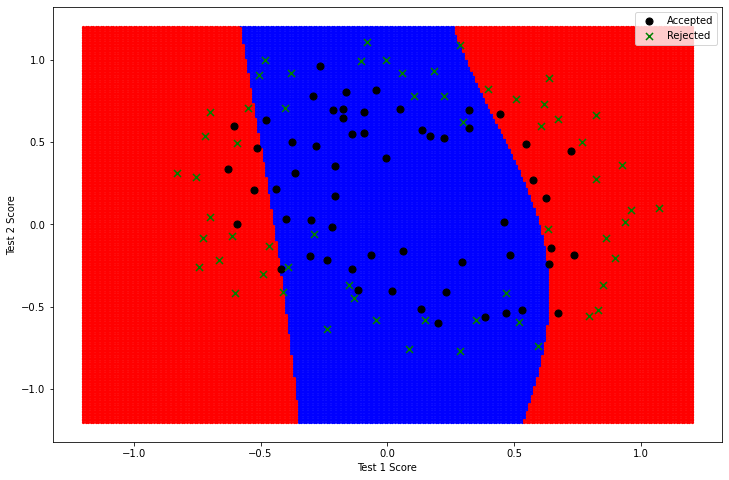

In [35]:
x1=np.arange(-1.2, 1.21, 0.01)
x2=np.arange(-1.2, 1.21, 0.01)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data3=pd.DataFrame(data=combinations)

x1 = data3[0]
x2 = data3[1]

data3.insert(2, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data3['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

cols = data3.shape[1]
X3 = data3.iloc[:,2:cols]
X3 = np.array(X3.values)
print(theta_min.shape)
y3 = predict(theta_min,X3)
data3['Predicted']=y3

data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

pred_positive = data3[data3['Predicted'].isin([1])]
pred_negative = data3[data3['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

So that we can increase its accuracy, we add an additional feature where the second variable is raised to the specified degrees. This will work because circles and ellipse have their second variables raised to a certain degree alone. 

If we rerun the code with the additional feature, it is seen that the accuracy improved to 96% 

In [36]:
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    data2['F' + str(0) + str(j+1)] = np.power(x1, 0) * np.power(x2, j+1)#additonal feature

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

#print(data2.head())

cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

costReg(theta2, X2, y2, learningRate)
gradientReg(theta2, X2, y2, learningRate)
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))

theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))
#print(theta_min)

accuracy = 96%


We run the code below to show the seperation. In fact we were able to make the intended ellipse. 

Its best fit function is: 

Y=sigmoid(2.83015509e-04 +  [1.33800117e-04] x + [2.65763238e-04] y - [4.93217697e-04] x^2  - [1.45036937e-04] (x)(y) - [3.14724436e-04] y^2 - [1.18375903e-05] (x^3) - [6.68730913e-05] (x^2)(y) - [5.86476677e-05] (x)(y^2) - [1.21111704e-04] (y^3) - [3.82316226e-04]x^4 - [1.15048037e-05] (x^3)(y) - [1.36253061e-04] (x^2)(y^2) - [3.19769878e-05] (x)(y^3) + [3.57819335e-04]x^4); where y<0.5 is 'rejected' while y>=0.5 is accepted.

Text(0, 0.5, 'Test 2 Score')

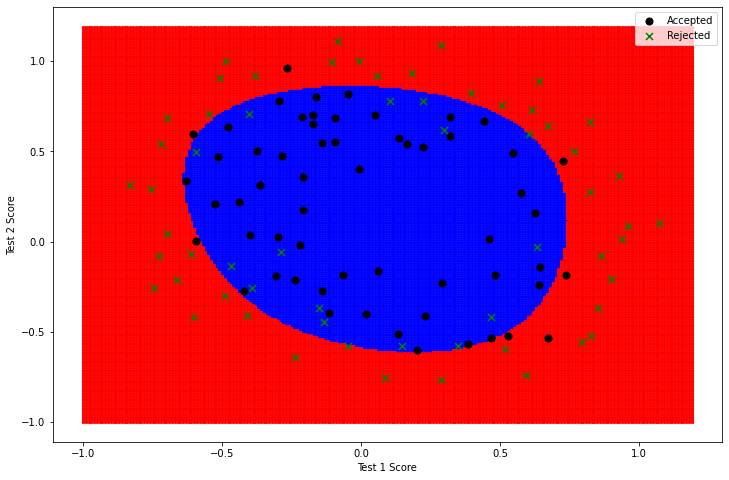

In [37]:
x1=np.arange(-1, 1.2, 0.01)
x2=np.arange(-1, 1.2, 0.01)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data3=pd.DataFrame(data=combinations)

x1 = data3[0]
x2 = data3[1]

data3.insert(2, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data3['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    data3['F' + str(0) + str(j+1)] = np.power(x1, 0) * np.power(x2, j+1)

cols = data3.shape[1]
X3 = data3.iloc[:,2:cols]
X3 = np.array(X3.values)
theta3 = np.zeros(X3.shape[1])

y3 = predict(theta_min,X3)
data3['Predicted']=y3

data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

pred_positive = data3[data3['Predicted'].isin([1])]
pred_negative = data3[data3['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

## CONCLUSION

When performing logistic regression on a dataset that can be separated using a line, it is best to leave the features as it is and then train the model. For datasets that have more complex geometries for separating the sample points, it is best to use feature mapping to achieve the said geometries. Likewise, it is also a good practice to use regularization in the gradient descent process to avoid overfitting.  